# <center> TP N°6 </center>
## <center> Différences finies - Part 2

</center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 BDA GR02 </center>
    <center> 06/12/2020 </center>
</div>

## I. On considère l'EDO:

$$
(P)
\left\{
    \begin{array}{ll}
        -u''(x) + 2u(x) = f(x) \ \text{ sur } \ \rbrack 0,1 \lbrack \\
        u(0)=1, \ \ u(1)=e \\
        f(x)=e^x
    \end{array}
\right. \\
$$
<br>
<center> Sachant que la solution exacte de $(P)$ est donnée par $u_{exact}(x) = e^x$ </center>

### I.1. Résoudre le problème $(P)$ par la méthode des différences finies
(via les différences finies, écrire le problème de $(P)$ sous la forme $Au=b$ )

$$
Au = b
\Leftrightarrow
\frac{1}{h^2}
\begin{pmatrix}
2 & -1 & 0 & \cdots & \cdots & \cdots & 0 
\\ 
-1 & 2(1+h^2) & -1 & 0 & \cdots & \cdots & 0 
\\
0 & -1 & 2(1+h^2) & -1 & 0 & \cdots & \vdots 
\\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots 
\\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots 
\\
0 & \cdots & \cdots & 0 & -1 & 2(1+h^2) & -1 
\\
0 & \cdots & \cdots & \cdots & 0 & -1 & 2(1+h^2)
\end{pmatrix}
.
\begin{pmatrix}
u_1
\\ 
u_2
\\
u_3
\\
\vdots 
\\
\vdots  
\\
u_{N-1} 
\\
u_{N}
\end{pmatrix}
=
\begin{pmatrix}
f(1) + 1/h^2
\\ 
f(2)
\\
f(3)
\\
\vdots 
\\
\vdots  
\\
f({N-1}) 
\\
f({N}) + e/h^2
\end{pmatrix}
$$

In [ ]:
# FOTO

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import time
from sympy import Matrix, init_printing
init_printing()

def trianginf(T,b):
    n = len(b)
    x = np.zeros(b.shape)

    x[0] = b[0] / T[0][0]
    for i in range(1,n):
        sigma = 0
        for j in range(0, i):
            sigma += T[i][j] * x[j]
        x[i] = (1/T[i][i]) * ( b[i] - sigma )
    return x

def triangsup(T,b):
    n = len(b)
    x = np.zeros(b.shape)

    x[n-1] = b[n-1] / T[n-1][n-1]
    for i in range(n-2,-1,-1):
        sigma = 0
        for j in range(i+1, n):
            sigma += T[i][j] * x[j]
        x[i] = (1/T[i][i]) * ( b[i] - sigma )
    return x

In [2]:
def cholesky(A):
    n = A.shape[0]
    C = np.zeros((n,n))
    C[0][0] = np.sqrt(A[0][0])

    for i in range(1, n):
        C[i][0] = A[i][0] / C[0][0]

    for j in range(1, n):
        s0 = 0 
        for k in range(0, j):
            s0 += C[j][k]**2
        C[j][j] = np.sqrt(A[j][j] - s0)
        for i in range (j, n):
            s1 = 0
            for k in range(0, j):
                s1 += C[i][k] * C[j][k]
            C[i][j] = (1 / C[j][j]) * ( A[i][j] - s1) 
    return C

In [12]:
def differences_finies(f, x0, xN, N, u0, uN):
    #    f   : fonction f(x) second membre
    #    N   : nombre d'intervalles 
    # x0, xN : bornes de l'intervalle
    # u0, uN : condition initiales
    
    h = 1/(N+1)

    f_vect = np.vectorize(f)

    # Définition des x_0, x_1, x_2, ..., x_N-1, x_N
    x = np.linspace(x0, xN, N+1)

    # Définition du vecteur b = [f(x_1)+1/h**2, f(x_2), ..., f(x_N-1), f(x_N-1)+e/h**2] 
    b = f_vect(x[1:N])
    b[0] += 1/(h**2) 
    b[N-2] += np.exp(1)/(h**2) 
    
    Diag_below = -1 * np.ones((N-2,))
    Diag_above = -1 * np.ones((N-2,))
    Diag_main  =  2 * (1 + h**2) * np.ones((N-1,))
    A = (1/h**2) * ( np.diag(Diag_below, -1) + np.diag(Diag_main) + np.diag(Diag_above, 1) )
    
    #print("\nA ",A.shape, " =\n")
    #display(Matrix(A))
    #print("\nb ",b.shape)
    #display(Matrix(b))
    
    C = cholesky(A)
    y = trianginf(C,b)
    u = triangsup(C.T,y)
    
    
    result = np.zeros((N+1,))
    result[0]   = u0
    result[1:N] = u
    result[N]   = uN
    
    return result,x

In [6]:
ui,xi = differences_finies(f = lambda x: np.exp(x), x0=0, xN=1, N=10, u0=1, uN=np.exp(1))
ui


A  (9, 9)  =



⎡244.0   -121.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0  ⎤
⎢                                                                      ⎥
⎢-121.0  244.0   -121.0   0.0     0.0     0.0     0.0     0.0     0.0  ⎥
⎢                                                                      ⎥
⎢ 0.0    -121.0  244.0   -121.0   0.0     0.0     0.0     0.0     0.0  ⎥
⎢                                                                      ⎥
⎢ 0.0     0.0    -121.0  244.0   -121.0   0.0     0.0     0.0     0.0  ⎥
⎢                                                                      ⎥
⎢ 0.0     0.0     0.0    -121.0  244.0   -121.0   0.0     0.0     0.0  ⎥
⎢                                                                      ⎥
⎢ 0.0     0.0     0.0     0.0    -121.0  244.0   -121.0   0.0     0.0  ⎥
⎢                                                                      ⎥
⎢ 0.0     0.0     0.0     0.0     0.0    -121.0  244.0   -121.0   0.0  ⎥
⎢                                                  


b  (9,)


⎡122.105170918076⎤
⎢                ⎥
⎢1.22140275816017⎥
⎢                ⎥
⎢ 1.349858807576 ⎥
⎢                ⎥
⎢1.49182469764127⎥
⎢                ⎥
⎢1.64872127070013⎥
⎢                ⎥
⎢1.82211880039051⎥
⎢                ⎥
⎢2.01375270747048⎥
⎢                ⎥
⎢2.22554092849247⎥
⎢                ⎥
⎣331.371704354701⎦

array([1.        , 1.11512543, 1.23954904, 1.37436683, 1.52074557,
       1.67993147, 1.85325904, 2.04216015, 2.24817339, 2.47295363,
       2.71828183])

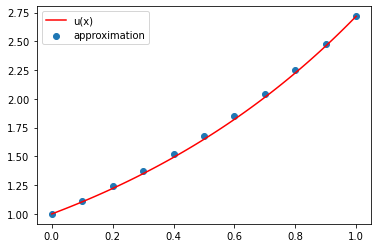

In [7]:
x_plot = np.linspace(0,1,100)
u = lambda x: np.exp(x)
u_vect = np.vectorize(u)
plt.plot(x_plot, u_vect(x_plot), label='u(x)', color='red')
plt.scatter(xi, ui, label='approximation')
plt.legend()
plt.show()

### I.2. Dessiner sur la même figure la solution approchée et la solution exacte en fonction du pas de la discrétisation

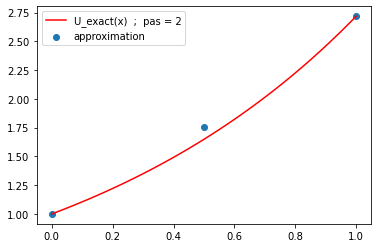

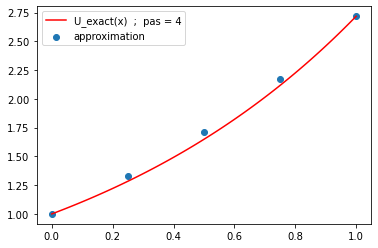

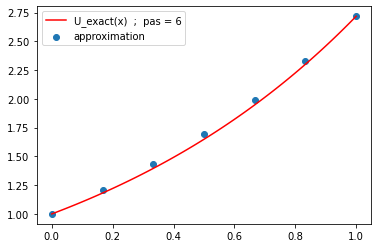

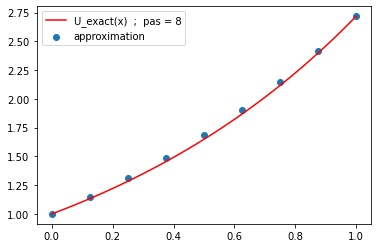

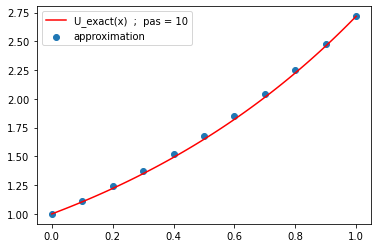

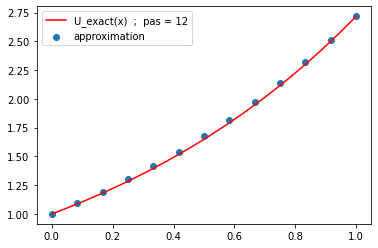

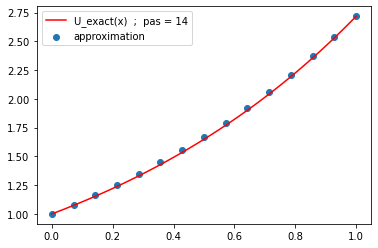

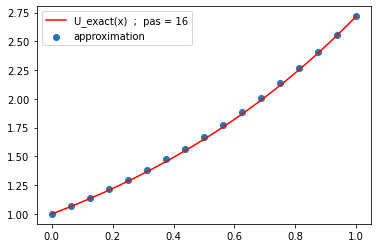

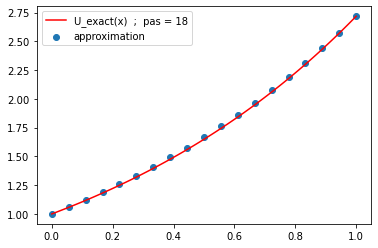

In [13]:
for N in range(2, 20, 2):
    ui,xi = differences_finies(f = lambda x: np.exp(x), x0=0, xN=1, N=N, u0=1, uN=np.exp(1))
    x_plot = np.linspace(0,1,100)
    u = lambda x: np.exp(x)
    u_vect = np.vectorize(u)
    plt.plot(x_plot, u_vect(x_plot), label='U_exact(x)  ;  pas = '+str(N), color='red')
    plt.scatter(xi, ui, label='approximation')
    plt.legend()
    plt.show()

### I.3. Dessiner l'erreur $(erreur = u_{approchée} - u_{exact} )$ en fonction du pas de la discrétisation
<br>
<center> ($log(erreur) = fct(log(h)$) </center>

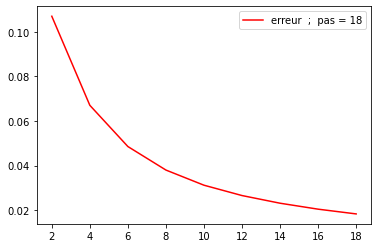

In [14]:
list_erreur = []
list_n = []

for N in range(2, 20, 2):
    ui,xi = differences_finies(f = lambda x: np.exp(x), x0=0, xN=1, N=N, u0=1, uN=np.exp(1))
    u = lambda x: np.exp(x)
    u_vect = np.vectorize(u)
    erreur_max = max(np.abs(u_vect(xi) - ui))
    
    list_erreur.append(erreur_max)
    list_n.append(N)
    
plt.plot(list_n, list_erreur, label='erreur', color='red')
plt.legend()
plt.show()

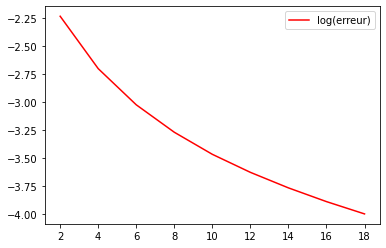

In [15]:
plt.plot(list_n, np.log(list_erreur), label='log(erreur)', color='red')
plt.legend()
plt.show()

## II. Equation de Poisson en 2D

On considère le problème suivant:

$$
(\widehat{P})
\left\{
    \begin{array}{ll}
        - \Delta u(x,y) = f(x,y) \ \text{ sur } \ \rbrack 0,1 \lbrack \\
        u|_{\partial \Omega} = 0 \ \ \ \ \text{(conditions de Dirichlet homogène)}
    \end{array}
\right. \\
$$

### II.1. Résoudre le problème $(\widehat{P})$ par la méthode des différences finies ( $f(x,y)=1$ )

In [22]:
N = 10
h = 1/(N+1)

Diag_below = 1 * np.ones(((N**2)-2,))
Diag_above = 1 * np.ones(((N**2)-2,))
Diag_below_below = 1 * np.ones(((N**2)-N-1,))
Diag_above_above = 1 * np.ones(((N**2)-N-1,))

for i in range(0, (N**2)-1):
    if i % (N-1) == 0 and i != 0: 
        Diag_below[i-1], Diag_above[i-1] = 0, 0
    
Diag_main  =  -4  * np.ones(((N**2)-1,))

A = (-1/h**2) * ( np.diag(Diag_below_below, -N) + np.diag(Diag_below, -1) + np.diag(Diag_main) +
                np.diag(Diag_above, 1) + np.diag(Diag_above_above, N) )

display(Matrix(A))

⎡484.0   -121.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0 
⎢                                                                             
⎢-121.0  484.0   -121.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0 
⎢                                                                             
⎢ 0.0    -121.0  484.0   -121.0   0.0     0.0     0.0     0.0     0.0     0.0 
⎢                                                                             
⎢ 0.0     0.0    -121.0  484.0   -121.0   0.0     0.0     0.0     0.0     0.0 
⎢                                                                             
⎢ 0.0     0.0     0.0    -121.0  484.0   -121.0   0.0     0.0     0.0     0.0 
⎢                                                                             
⎢ 0.0     0.0     0.0     0.0    -121.0  484.0   -121.0   0.0     0.0     0.0 
⎢                                                                             
⎢ 0.0     0.0     0.0     0.0     0.0    -121.0  484

In [79]:
def differences_finies(f, x0, xN, y0, yN, N):
    #    f   : fonction f(x) second membre
    #    N   : nombre d'intervalles 
    # x0, xN : bornes de l'intervalle
    # u0, uN : condition initiales
    
    h = 1/(N+1)

    f_vect = np.vectorize(f)

    # Définition des x_0, x_1, x_2, ..., x_N-1, x_N
    x = np.linspace(x0, xN, N+1)
    y = np.linspace(y0, yN, N+1)
    
    xy = []
    for i in x[1:N+1]:
        for j in y[1:N+1]:
            xy.append([i, j])
    xy = np.array(xy)
    
    # Définition du vecteur b = [f(x_1)+1/h**2, f(x_2), ..., f(x_N-1), f(x_N-1)+e/h**2] 
    b = f_vect(xy[:,0], xy[:,1])
    Diag_below = 1 * np.ones(((N**2)-1,))
    Diag_above = 1 * np.ones(((N**2)-1,))
    Diag_below_below = 1 * np.ones(((N**2)-N,))
    Diag_above_above = 1 * np.ones(((N**2)-N,))

    for i in range(0, (N**2)):
        if i % (N-1) == 0 and i != 0: 
            Diag_below[i-1], Diag_above[i-1] = 0, 0

    Diag_main  =  -4  * np.ones(((N**2),))

    A = (-1/h**2) * ( np.diag(Diag_below_below, -N) + np.diag(Diag_below, -1) + np.diag(Diag_main) +
                    np.diag(Diag_above, 1) + np.diag(Diag_above_above, N) )
    
    #print("\nA ",A.shape, " =\n")
    #display(Matrix(A))
    #print("\nb ",b.shape)
    #display(Matrix(b))

    C = cholesky(A)
    y = trianginf(C,b)
    u = triangsup(C.T,y)
    
    result = np.zeros((u.shape[0] + 4*N + 4,))
    for i in range(1, N+1):
        result[i*(N+2)+1: i*(N+2)+1+N] = u[(i-1)*N:(i-1)*N + N]
        
    return result,xy

In [82]:
ui,xy = differences_finies(f = lambda x, y: -1, x0=0, xN=1, y0 = 0, yN = 1, N=10)
ui

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01423817, -0.01953797,
       -0.02115968, -0.02095199, -0.01968478, -0.01775537, -0.01544083,
       -0.0130332 , -0.01101   , -0.01787873,  0.        ,  0.        ,
       -0.02915025, -0.03448958, -0.03588429, -0.03469904, -0.03176727,
       -0.02763143, -0.02271027, -0.0174175 , -0.02274235, -0.03410021,
        0.        ,  0.        , -0.04173007, -0.04512133, -0.0449244 ,
       -0.04192815, -0.03678938, -0.03002835, -0.02208686, -0.02566207,
       -0.03759474, -0.04578521,  0.        ,  0.        , -0.05028403,
       -0.05107682, -0.04849937, -0.04303531, -0.03516929, -0.02534128,
       -0.02734434, -0.03937158, -0.04792488, -0.05289739,  0.        ,
        0.        , -0.05427955, -0.05213809, -0.04669647, -0.03827999,
       -0.02724671, -0.02790302, -0.03965444, -0.04829059, -0.05

### II.2. Comparer la solution obtenue numériquement pour le cas $f(x,y) = -1$ avec la solution exacte donnée par la formule suivante:

$$
u_{exact} = \sum^{\infty}_{l=0} \sum^{\infty}_{m=0} u_{lm} \cdot sin((2l-1)\pi x) \cdot sin((2m-1)\pi y) \\
\text{où } \ \ \ \ \ u_{lm} = \frac{-16}{((2l-1)^2+(2m-1)^2)\pi^4 (2l-1)(2m-1)}
$$

In [95]:
def u_exact(x, y):
    u_exact = 0
    u_lm = 0
    for l in range(0,100):
        for m in range(0,100):
            u_lm = -16/( ( (2*l-1)**2 + (2*m-1)**2) *(np.pi**4)*(2*l-1)*(2*m-1) )
            u_exact += u_lm * np.sin((2*l-1)*np.pi*x) * np.sin((2*m-1)*np.pi*y)
    return u_exact

In [96]:
f_vect = np.vectorize(u_exact)
u_Exact = f_vect(xy[:,0], xy[:,1])
print(len(u_Exact))
result_exact = np.zeros((u_Exact.shape[0] + 4*N + 4,))
for i in range(1, N+1):
    result_exact[i*(N+2)+1: i*(N+2)+1+N] = u_Exact[(i-1)*N:(i-1)*N + N]
result_exact

100


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.02995372e-02, -7.06178375e-02, -9.22727205e-02,
       -1.05372088e-01, -1.09764839e-01, -1.05372088e-01, -9.22727205e-02,
       -7.06178375e-02, -4.02995372e-02, -1.84058581e-17,  0.00000000e+00,
        0.00000000e+00, -7.06178375e-02, -1.25346528e-01, -1.64730461e-01,
       -1.88592553e-01, -1.96596263e-01, -1.88592553e-01, -1.64730461e-01,
       -1.25346528e-01, -7.06178375e-02, -3.12118177e-17,  0.00000000e+00,
        0.00000000e+00, -9.22727205e-02, -1.64730461e-01, -2.17173394e-01,
       -2.49014742e-01, -2.59701640e-01, -2.49014742e-01, -2.17173394e-01,
       -1.64730461e-01, -9.22727205e-02, -4.03456690e-17,  0.00000000e+00,
        0.00000000e+00, -1.05372088e-01, -1.88592553e-01, -2.49014742e-01,
       -2.85753457e-01, -

## III. L'équation de la chaleur en 1D

On considère le problème suivant:

$$
(\widetilde{P})
\left\{
    \begin{array}{ll}
        \frac{\partial v}{\partial t} - \frac{\partial^2 v}{\partial x^2} = 0  \ \ \ \ \ \forall (x,t) \ \in  \ \ \lbrack 0,1 \rbrack  \ \ \times \ \ \mathbb{R} \\
        v(t,0) = v(t,1) = 0 \ \ \ \ \ \forall \ \ t \ \in  \ \ \mathbb{R} \\
        v(x,0) = v_0(x) \ \ \ \ \ \forall \ \ x \ \in  \ \ \ \lbrack 0,1 \rbrack
    \end{array}
\right. \\
$$

On discrétise $(\widetilde{P})$ par le schéma suivant:

$$
\frac{v^{n+1}_{j} - v^{n}_{j} }{\Delta t} - \frac{v^{n}_{j+1} - 2v^{n}_{j} + v^{n}_{j-1} }{(\Delta x)^2} = 0 \ \ \ \ (\ast) \\
\\ 
(t_n, x_j) = (n \Delta t, j \Delta x) ; \ \ \ \forall n \ \ \geq \ 0, \ \ \forall \ j \ \in \ \{0, 1, ..., N+1 \} \\
\text{où } \ \ \Delta x = \frac{1}{N+1} \ \text{et} \ \Delta t \gt 0
$$

### III.1. Ecrire le problème discrétisé $(\ast)$ sous la forme matricielle.

### III.2. Implémenter numériquement le problème matriciel obtenu avec $v_0(x)=e^x$